<a href="https://colab.research.google.com/github/mau-lozada/Clasificaci-nCrediticia_KNN/blob/main/Clasificaci%C3%B3n_Morosidad_crediticia_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de Morosidad Crediticia con KNN 🏦

**Objetivo**: Predecir si un cliente pagará un crédito (clase 1) o será moroso (clase 0) usando el algoritmo K-Nearest Neighbors (KNN).

**Dataset**:
- `creditos.csv`: Contiene 200 registros con las columnas:
  - `edad`: Edad del cliente.
  - `credito`: Monto del crédito otorgado.
  - `cumplio`: Variable binaria (1 = pagó, 0 = no pagó).

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [6]:
clientes = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditos.csv")
clientes.head(5)

,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0


**Exploración inicial**:  
- Se cargaron 200 registros.
- Las primeras 5 filas muestran la estructura de los datos.

In [7]:
clientes.describe()

,edad,credito,cumplio
count,200.000000,200.000000,200.000000
mean,37.280000,289946.670000,0.835000
std,9.148776,137945.585277,0.372112
min,18.000000,100000.000000,0.000000
25%,29.000000,172966.500000,1.000000
50%,37.500000,276234.000000,1.000000
75%,45.000000,394574.500000,1.000000
max,57.000000,596771.000000,1.000000


**Insights del Dataset**:  

- **Edad**:  
  - Rango: 18 a 57 años.  
  - Media: 37.28 años.  
  - 50% de los clientes tienen entre 29 y 45 años.  

- **Monto de crédito**:  
  - Rango: \$100,000 a \$596,771.  
  - Media: \$289,946.  
  - 50% de los créditos están entre \$172,966 y \$394,574.  

- **Cumplimiento (target)**:  
  - **Clase 1 (Pagó)**: 83.5% (167 registros).  
  - **Clase 0 (No pagó)**: 16.5% (33 registros).  

**Observación**: Hay un **desequilibrio de clases** (muchos más clientes que pagaron). Esto podría afectar la métrica de precisión si no se maneja adecuadamente.  

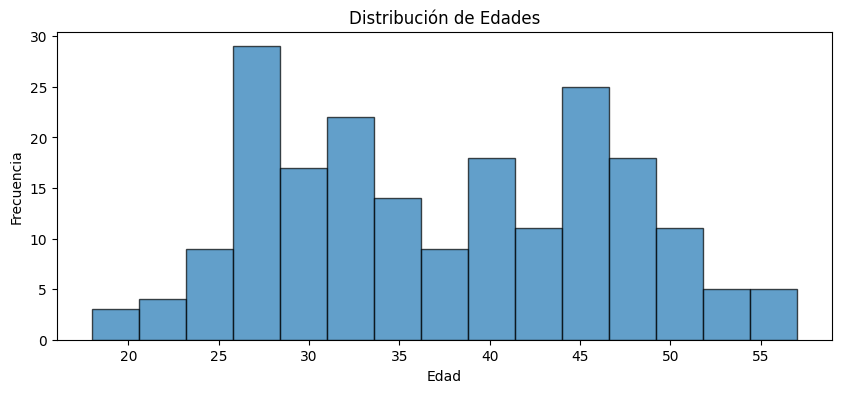

In [8]:
# Histograma de edades
plt.figure(figsize=(10, 4))
plt.hist(clientes["edad"], bins=15, edgecolor="black", alpha=0.7)
plt.title("Distribución de Edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

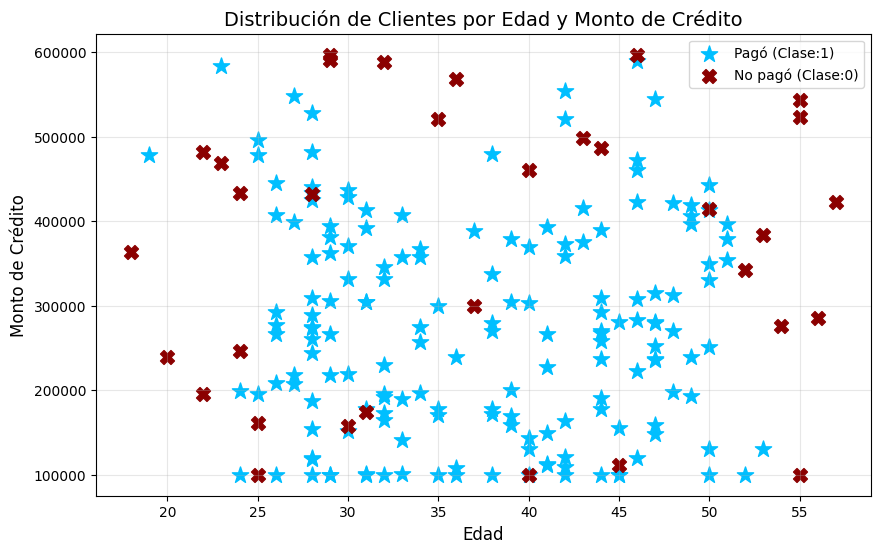

In [9]:
# Filtramos clientes por clase
clientes_buenos = clientes[clientes["cumplio"] == 1]
clientes_morosos = clientes[clientes["cumplio"] == 0]

# Creamos gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(clientes_buenos["edad"], clientes_buenos["credito"],
            marker="*", s=150, c="deepskyblue", label="Pagó (Clase:1)")
plt.scatter(clientes_morosos["edad"], clientes_morosos["credito"],
            marker="X", s=100, c="darkred", label="No pagó (Clase:0)")

plt.xlabel("Edad", fontsize=12)
plt.ylabel("Monto de Crédito", fontsize=12)
plt.title("Distribución de Clientes por Edad y Monto de Crédito", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**Visualización**:  
- Los clientes que **pagaron** (clase 1) se muestran con estrellas (*) azules.  
- Los clientes **morosos** (clase 0) se muestran con cruces (X) rojas.  
- Se observa que la mayoría de los clientes han cumplido con el pago, mientras que los morosos están distribuidos en diferentes rangos de edad y monto de crédito.

Los clientes que no pagaron parecen concentrarse en montos más altos de crédito, pero no hay una correlación clara con la edad.

## Preprocesamiento

In [14]:
# Seleccionar variables predictoras (X) y variable objetivo (y)
X = clientes[["edad", "credito"]]  # Features
y = clientes["cumplio"]            # Target

escalador = preprocessing.MinMaxScaler()  # Escalador Min-Max (0-1)
X_escalado = escalador.fit_transform(X)   # Aplicar escalado a TODO el dataset

# Crear los folds estratificados (mantiene proporción de clases)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### 🔧 **Validación del Modelo**  
Debido al **tamaño reducido del dataset (200 registros)** y el **desequilibrio de clases (83.5% vs 16.5%)**, se utilizó **validación cruzada estratificada de 5 folds** para:  
1. Aprovechar al máximo los datos disponibles.  
2. Garantizar que cada fold mantenga la proporción de clases.  
3. Obtener una estimación robusta del rendimiento general del modelo.  

**Resultados**:  
- Precisión promedio: 85.00% (±5.50%).  

## Entenamiento

In [34]:
# Crear y entrenar clasificador KNN
clasificador_knn = KNeighborsClassifier(n_neighbors=3)

# Ejecutar validación cruzada
scores = cross_val_score(
    clasificador_knn,
    X_escalado,
    y,
    cv=cv,  # cv ya definido en la celda 6
    scoring="accuracy"
)

# Resultados de validación
print("Resultados de Validación Cruzada:")
print(f"- Precisión promedio: {scores.mean():.2%}")
print(f"- Desviación estándar: ±{scores.std():.2%}")

Resultados de Validación Cruzada:
- Precisión promedio: 84.50%
- Desviación estándar: ±2.92%


In [35]:
# Entrenamos con TODOS los datos para usar en producción
clasificador_knn.fit(X_escalado, y)

KNeighborsClassifier(n_neighbors=3)

In [36]:
# Opcional: Matriz de confusión en todo el dataset (cuidado con el overfitting)
y_pred = clasificador_knn.predict(X_escalado)
print("\n Matriz de Confusión (Datos Completos):")
print(confusion_matrix(y, y_pred))


 Matriz de Confusión (Datos Completos):
[[ 18  15]
 [  3 164]]


## 📌 Interpretación de Resultados  

### **Conclusiones Clave**:  
1. **Precisión General**: 84.5% (±2.92%), pero **no es la métrica más confiable** debido al desbalanceo.  
2. **Clase Minoritaria (Morosos)**:  
   - El modelo solo detecta **54.5% de los morosos reales** (Recall bajo).  
   - Erróneamente clasifica **15 morosos** como cumplidores (riesgo financiero).  
3. **Clase Mayoritaria (Cumplidores)**:  
   - Detecta **98.2% de los cumplidores** (alto Recall).  
   - Solo **3 cumplidores** fueron erroneamente marcados como morosos (bajo riesgo comercial).  

### **Recomendaciones**:  
- **Métricas Adicionales**: Usar F1-Score o Matriz de Confusión estratificada para evaluar mejor el modelo.   

In [41]:
#Reporte de clasificación
from sklearn.metrics import classification_report

# Predecir en todos los datos (solo para análisis)
y_pred = clasificador_knn.predict(X_escalado)

print("Reporte de Clasificación:")
print(classification_report(y, y_pred, target_names=["No pagó (Clase 0)", "Pagó (Clase 1)"]))

Reporte de Clasificación:
                   precision    recall  f1-score   support

No pagó (Clase 0)       0.86      0.55      0.67        33
   Pagó (Clase 1)       0.92      0.98      0.95       167

         accuracy                           0.91       200
        macro avg       0.89      0.76      0.81       200
     weighted avg       0.91      0.91      0.90       200



## 📊 Interpretación de Métricas  

### **Clase Minoritaria (No pagó)**:  
- **Recall (55%)**: El modelo solo identifica **55% de los morosos reales**.  
  - Ejemplo: De 33 morosos, solo detectó 18.  
- **F1-Score (67%)**: Indica un equilibrio subóptimo entre precisión y recall.  

### **Clase Mayoritaria (Pagó)**:  
- **Recall (98%)**: El modelo identifica **casi todos los cumplidores** (164/167).  
- **Precisión (92%)**: Alto porcentaje de aciertos cuando predice "Pagó".  

### **Conclusión**:  
El modelo está **sesgado hacia la clase mayoritaria** (cumplidores), lo que es riesgoso para un sistema crediticio.  

## Empezamos a hacer la predicción si otro cliente quisiera obtener un nuevo crédito

In [50]:
#Ejemplo práctio
edad_nuevo = 35
monto_nuevo = 350000  # Monto en la misma unidad que el dataset original

# 1. Escalar los datos del nuevo cliente (usando el mismo escalador)
cliente_nuevo = np.array([[edad_nuevo, monto_nuevo]])  # Convertir a array 2D
cliente_nuevo_escalado = escalador.transform(cliente_nuevo)  # Escalar

# 2. Predecir clase y probabilidades
clase_predicha = clasificador_knn.predict(cliente_nuevo_escalado)
probabilidades = clasificador_knn.predict_proba(cliente_nuevo_escalado)

# 3. Mostrar resultados
print("\n" + "="*50)
print("🔍 **Resultado de la Predicción:**")
print(f"- Edad del cliente: {edad_nuevo} años")
print(f"- Monto solicitado: ${monto_nuevo:,.2f}")
print(f"- Clase predicha: {'✅ PAGARÁ (Clase 1)' if clase_predicha[0] == 1 else '❌ NO PAGARÁ (Clase 0)'}")
print(f"- Probabilidad de no pago: {probabilidades[0][0]:.2%}")
print(f"- Probabilidad de pago: {probabilidades[0][1]:.2%}")
print("="*50 + "\n")


🔍 **Resultado de la Predicción:**
- Edad del cliente: 35 años
- Monto solicitado: $350,000.00
- Clase predicha: ✅ PAGARÁ (Clase 1)
- Probabilidad de no pago: 0.00%
- Probabilidad de pago: 100.00%



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


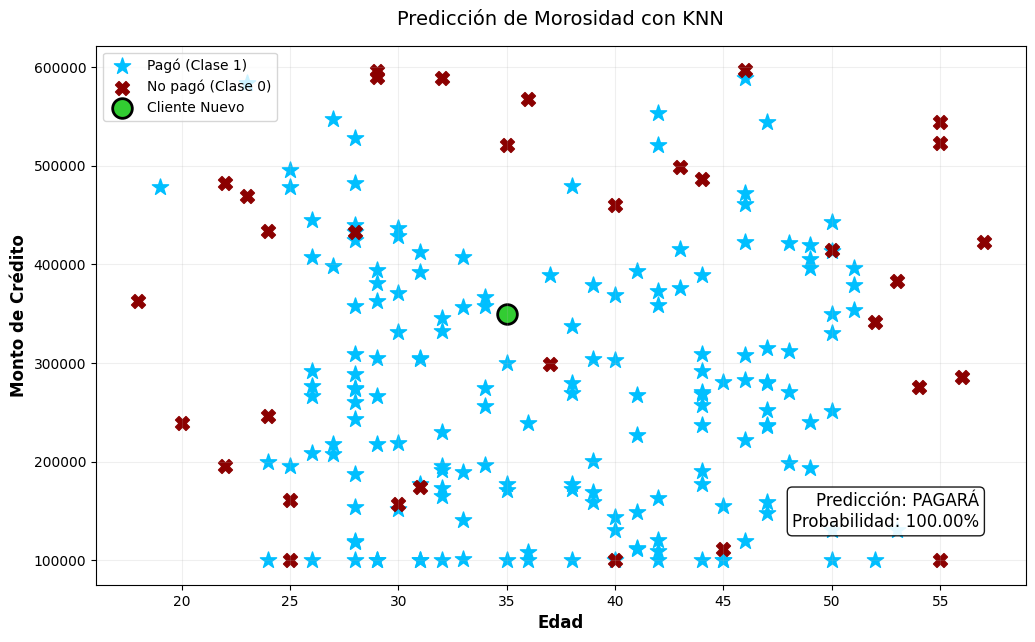

In [51]:
plt.figure(figsize=(12, 7))

# Graficar clientes existentes
plt.scatter(clientes_buenos["edad"], clientes_buenos["credito"],
            marker="*", s=150, c="deepskyblue", label="Pagó (Clase 1)")
plt.scatter(clientes_morosos["edad"], clientes_morosos["credito"],
            marker="X", s=100, c="darkred", label="No pagó (Clase 0)")

# Graficar nuevo cliente (usando datos originales)
plt.scatter(edad_nuevo, monto_nuevo,
            marker="o", s=200, c="limegreen", edgecolor="black",
            linewidth=2, label="Cliente Nuevo")

# Añadir texto de predicción
texto_prediccion = f"Predicción: {'PAGARÁ' if clase_predicha[0] == 1 else '❌ NO PAGARÁ'}\nProbabilidad: {probabilidades[0][1]:.2%}"
plt.text(
    0.95,  # Posición X (95% del ancho del gráfico)
    0.10,  # Posición Y (10% del alto)
    texto_prediccion,
    transform=plt.gca().transAxes,  # Usar coordenadas relativas
    ha="right",  # Alineación horizontal derecha
    va="bottom",  # Alineación vertical inferior
    fontsize=12,
    bbox=dict(facecolor="white", alpha=0.9, edgecolor="black", boxstyle="round")
)

# Ajustes estéticos
plt.xlabel("Edad", fontsize=12, fontweight="bold")
plt.ylabel("Monto de Crédito", fontsize=12, fontweight="bold")
plt.title("Predicción de Morosidad con KNN", fontsize=14, pad=15)
plt.grid(alpha=0.2)
plt.legend(loc="upper left")

plt.show()

## 📊 Visualización del Nuevo Cliente  

**Interpretación**:  
- El punto verde representa al cliente nuevo en el espacio original de features (edad y monto **sin escalar**).  
- Su posición relativa a los demás clientes ayuda a entender por qué el modelo predijo "PAGARÁ".  